# Introduction:
<p align="justify">

E-commerce is growing faster than ever, and platforms like Amazon have become the best place for millions of customers to shop every day. With so many products categories available, it is important for sellers to understand what really drives customer choices. Prices, discounts, ratings, and reviews all play a big role but the way they interact is not always straightforward.The goal of this project is to take a closer look at Amazon product data to uncover patterns that can help businesses make smarter decisions. By cleaning the data, running analysis, and visualizing the results, this project highlights where discounts work best, which categories have the strongest potential and how customer engagement is shaped by pricing and quality.The findings can support sellers in adjusting their pricing strategies, investing in the right categories and ultimately improving both profitability and customer satisfaction.  


# Research Questions:
1. Which product categories generate the highest average discounted price?
2. Are deeper discounts associated with higher ratings or review counts?
3. Which products/categories receive the highest ratings?
4. Which categories appear to be most competitive?
5. Which products have the largest price gap between actual and discounted price?


# Methodology

This project follows a structured data analysis approach to examine pricing, discounts, ratings, and customer engagement in Amazon product data. The methodology consists of the following key steps:

### 1. Data Collection
- The dataset was obtained from kaggle where containing information on product details such as:
  - Product ID and Product Name  
  - Category  
  - Actual Price and Discounted Price  
  - Discount Percentage  
  - Ratings and Rating Count  
  - Additional descriptive fields ( product links, review details).  

### 2. Data Cleaning and Preprocessing
- Removed currency symbols, commas, and percentage signs to convert numerical fields (actual price, discounted price, discount percentage,rating count) into numeric formats.  
- Handled missing or invalid values in ratings and reviews.  
- Created new derived features:
- Price Gap = Actual Price − Discounted Price  
- Normalized Rating Counts for better comparison across products.  

### 3. Exploratory Data Analysis (EDA)
- Summarized the dataset using shape, column names and sample records.  
- Conducted descriptive statistics (mean, median, and distribution analysis) for pricing, ratings and discount-related variables.  
- Visualized patterns using bar charts, scatter plots and category-level comparisons.  

### 4. Analytical Questions
The following key research questions guided the analysis:  
1. Which categories have the highest average discounted price?  
2. Do higher discounts lead to higher ratings or more customer reviews?  
3. Which categories and products achieve the highest ratings?  
4. Which categories are the most competitive (by product count and total reviews)?  
5. Which products show the largest price gaps (perceived biggest deals)?  

### 5. Visualization and Insights
- Used Matplotlib and Seaborn to create bar plots, scatter plots and comparative visualizations.  
- Logarithmic scaling was applied where necessary to improve interpretability.  
- Highlighted top categories and products based on key performance indicators.  

### 6. Decision-Making and Recommendations
- Interpreted the results to draw meaningful conclusions regarding pricing strategy, category investment, product portfolio management, and customer engagement.  
- Provided actionable business recommendations based on observed patterns.  





In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Load CSV file
df = pd.read_csv(r'/Users/mahmudulhasan/Desktop/amazon.csv')


print(df.shape)
print(df.columns)
df.head()

(1465, 16)
Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [11]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [13]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# Explaratory Data Analysis:


    1. Which product categories generate the highest average discounted price?



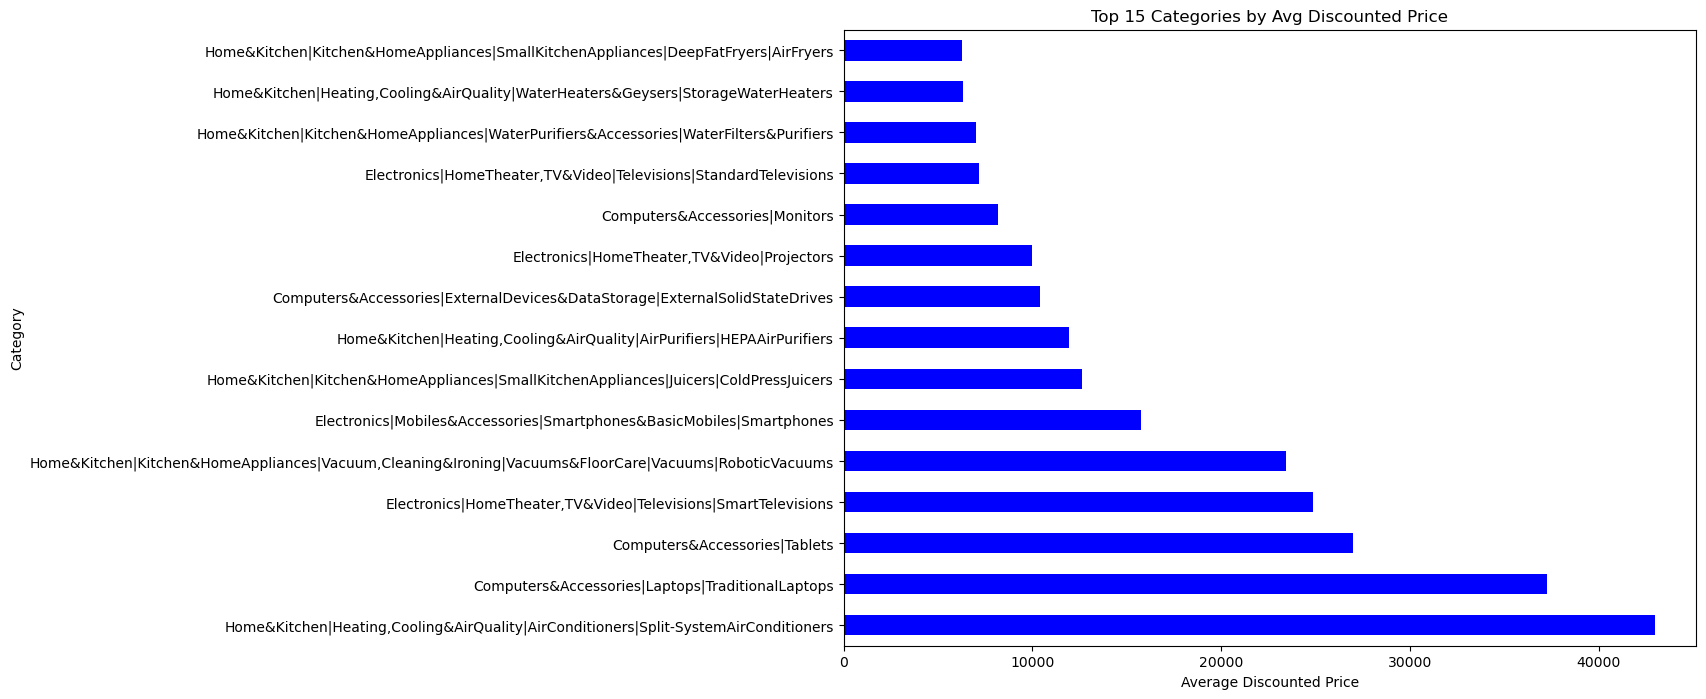

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df['discounted_price'] = df['discounted_price'].astype(str).str.replace(r'[^\d.]','',regex=True).astype(float)

q1 = df.groupby("category")['discounted_price'].mean().sort_values(ascending=False).head(15)

# Plot
q1.plot(kind="barh", figsize=(11,8), color="blue")
plt.title("Top 15 Categories by Avg Discounted Price")
plt.xlabel("Average Discounted Price")
plt.ylabel("Category")
plt.show()


   2.Are deeper discounts associated with higher ratings or review counts?

Corr (Discount % vs Rating): -0.15537543972693008
Corr (Discount % vs Reviews): 0.011690974046132849


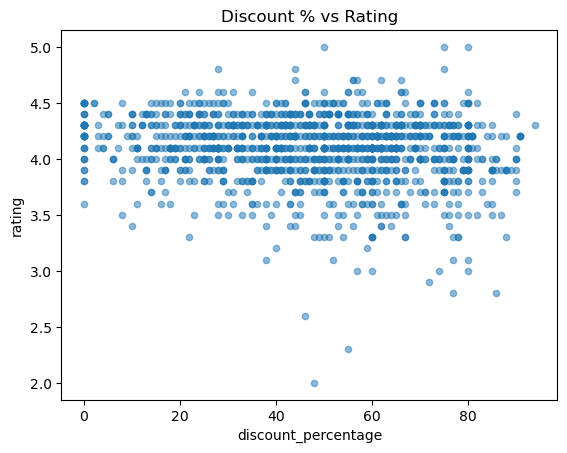

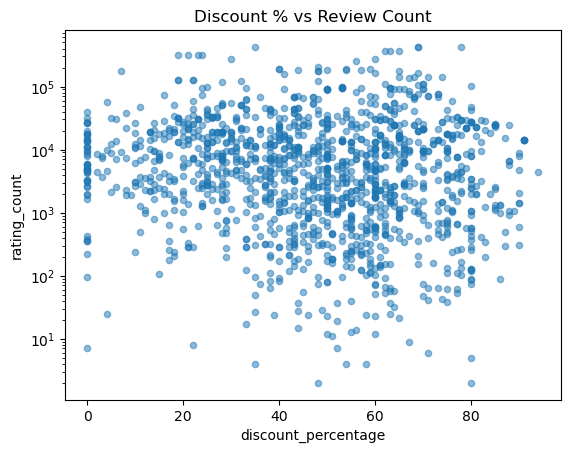

In [21]:
import matplotlib.pyplot as plt

df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%','').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].astype(str).str.replace(',','').astype(float)

print("Corr (Discount % vs Rating):", df['discount_percentage'].corr(df['rating']))
print("Corr (Discount % vs Reviews):", df['discount_percentage'].corr(df['rating_count']))

df.plot(kind="scatter", x="discount_percentage", y="rating", alpha=0.5, title="Discount % vs Rating")
plt.show()

df.plot(kind="scatter", x="discount_percentage", y="rating_count", alpha=0.5, title="Discount % vs Review Count", logy=True)
plt.show()


  3. Which products/categories receive the highest ratings?

/var/folders/mr/9b14_4817s76308zs0bnw1y80000gn/T/ipykernel_12190/2594417124.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=q3.index, x=q3.values, palette="Greens_r")


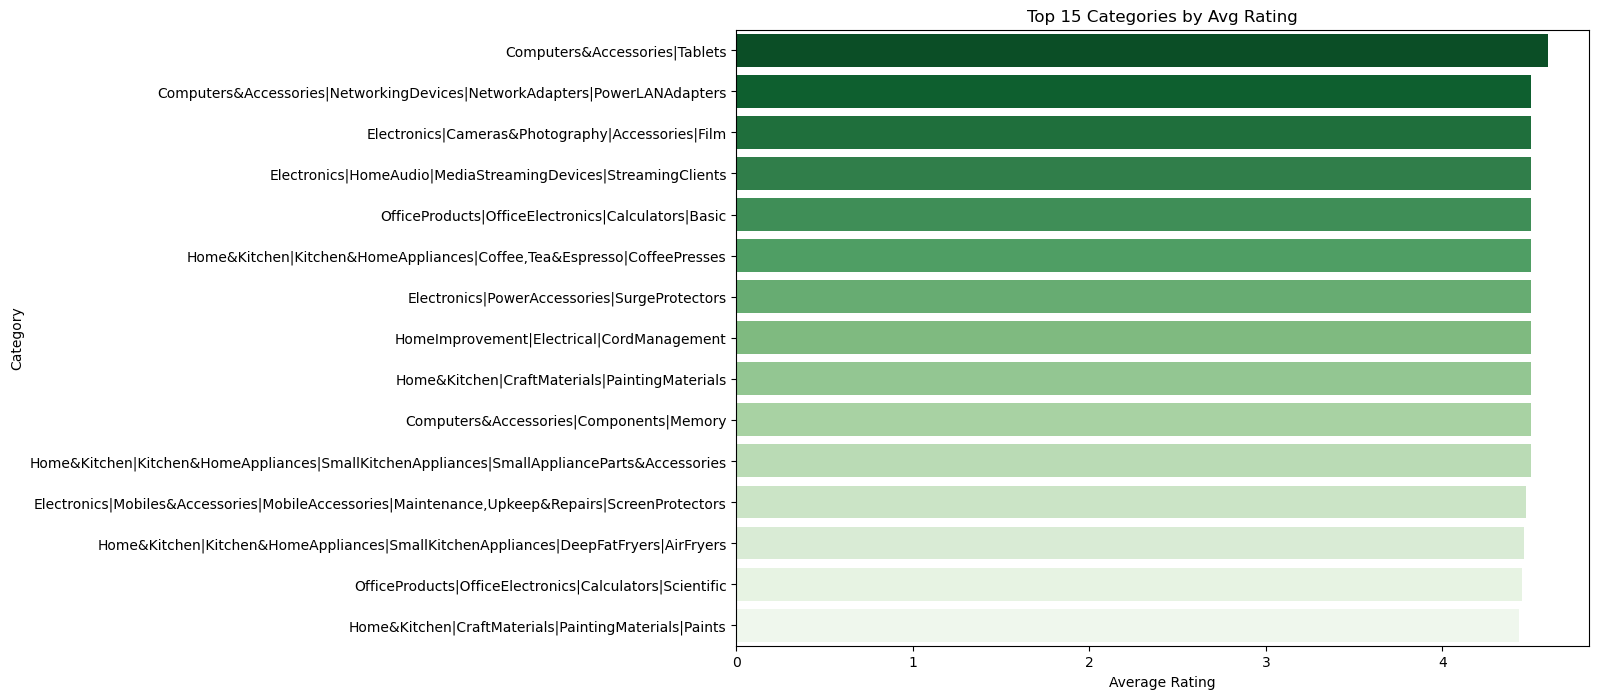

In [25]:
q3 = df.groupby("category")['rating'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(11,8))
sns.barplot(y=q3.index, x=q3.values, palette="Greens_r")
plt.title("Top 15 Categories by Avg Rating")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.show()


  4. Which categories appear to be most competitive?

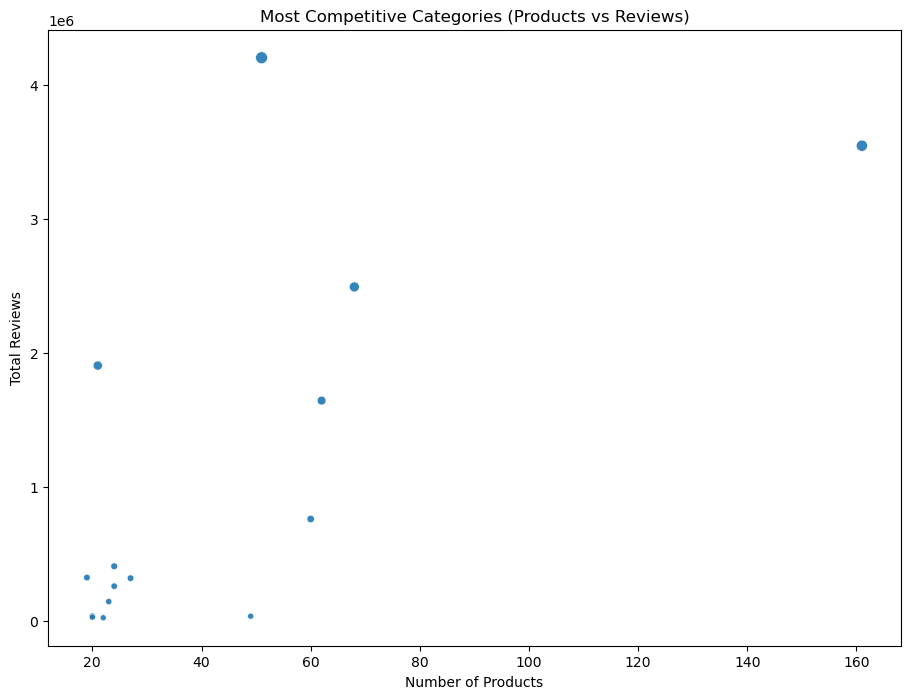

In [28]:
q4 = df.groupby("category").agg(
    n_products=("product_id","nunique"),
    total_reviews=("rating_count","sum")
).sort_values(by=["n_products","total_reviews"], ascending=False).head(15)

plt.figure(figsize=(11,8))
sns.scatterplot(data=q4, x="n_products", y="total_reviews", size="total_reviews", legend=False, alpha=0.9)
plt.title("Most Competitive Categories (Products vs Reviews)")
plt.xlabel("Number of Products")
plt.ylabel("Total Reviews")
plt.show()


   5. Which products have the largest price gap (actual – discounted)?

In [31]:
import pandas as pd

# make prices numeric (remove ₹ and commas)
for c in ['actual_price','discounted_price']:
    df[c] = pd.to_numeric(df[c].astype(str).str.replace(r'[^\d.]','', regex=True), errors='coerce')

# price gap = actual - discounted
df['price_gap'] = df['actual_price'] - df['discounted_price']

# top 15 biggest gaps
q5 = (df[['product_name','category','actual_price','discounted_price','price_gap']]
      .dropna()
      .sort_values('price_gap', ascending=False)
      .head(15))

q5   # 👈 this will display the table in Jupyter


,product_name,category,actual_price,discounted_price,price_gap
249,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",139900.0,77990.0,61910.0
1182,"Coway Professional Air Purifier for Home, Long...","Home&Kitchen|Heating,Cooling&AirQuality|AirPur...",59900.0,14400.0,45500.0
568,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics|Mobiles&Accessories|Smartphones&Ba...,74999.0,37990.0,37009.0
150,VU 138 cm (55 inches) Premium Series 4K Ultra ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",65000.0,29990.0,35010.0
1354,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,"Home&Kitchen|Heating,Cooling&AirQuality|AirCon...",75990.0,42990.0,33000.0
1306,ECOVACS DEEBOT N8 2-in-1 Robotic Vacuum Cleane...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",59900.0,27900.0,32000.0
283,LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...,"Electronics|HomeTheater,TV&Video|Televisions|S...",79990.0,47990.0,32000.0
255,VU 164 cm (65 inches) The GloLED Series 4K Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",85000.0,54990.0,30010.0
108,VU 139 cm (55 inches) The GloLED Series 4K Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",65000.0,37999.0,27001.0
323,TCL 108 cm (43 inches) 4K Ultra HD Certified A...,"Electronics|HomeTheater,TV&Video|Televisions|S...",51990.0,24990.0,27000.0


# Conclusion

This analysis shows that discounts, ratings and category performance are not equally influential across all products. Categories with high ratings and strong customer engagement present the best opportunities for growth while oversaturated categories with low review activity may require differentiation beyond pricing. Products with large price gaps can attract attention but must be positioned carefully to maintain customer trust.

Overall, the data suggests that targeted discounting, strategic category investment and customer engagement initiatives are more effective than blanket discount strategies. By focusing on high-potential categories and trusted products, Amazon sellers can maximize both profitability and customer satisfaction.
